In [19]:
from scipy.linalg import sqrtm
from scipy.stats import norm
import numpy as np
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt

In [20]:
mu = np.array([3,8])

In [21]:
Sigma = np.array([[1,1],[1,2]])

In [22]:
rho = 1/np.sqrt(2)

In [23]:
np.random.seed(42)

In [24]:
# The lengths of the confidence intervals for each
# repetition of the experiment
fisher_lens = np.empty(1000)
boot_lens = np.empty(1000)

# Whether the computed confidence interval contains the
# true correlation for each repetition of the experiment
fisher_coverage = np.empty(1000)
boot_coverage = np.empty(1000)

In [25]:
f = lambda r: (np.log(1+r) - np.log(1-r))/2
g = lambda z: (np.exp(2*z) - 1)/(np.exp(2*z) + 1)
n = 100
z = norm.ppf(1 - 0.05/2)

In [26]:
for i in range(1000):
    X = multivariate_normal(mean=mu, cov=Sigma, size=n)
    
    # The predicted correlation
    rho_hat = np.corrcoef(X[:,0], X[:,1])[0,1]
    
    # Apply Fisher's method
    theta_hat = f(rho_hat)
    se_hat = 1/np.sqrt(n-3)
    a = theta_hat - z*se_hat
    b = theta_hat + z*se_hat
    c = g(a)
    d = g(b)
    fisher_lens[i] = d-c
    fisher_coverage[i] = 1 if (c <= rho and rho <= d) else 0
    
    # Apply the bootstrap
    B = int(1e3)
    T_boot = np.empty(B)
    for j in range(B):
        X_star = X[np.random.choice(range(n), size=n, replace=True)]
        T_boot[j] = np.corrcoef(X_star[:,0], X_star[:,1])[0,1]
    v_boot = T_boot.var()
    se_boot = np.sqrt(v_boot)
    c_boot = rho_hat - z*se_boot
    d_boot = rho_hat + z*se_boot
    boot_lens[i] = d_boot - c_boot
    boot_coverage[i] = 1 if (c_boot <= rho and rho <= d_boot) else 0

Let's plot a histogram of the lengths of the confidence intervals to compare them.

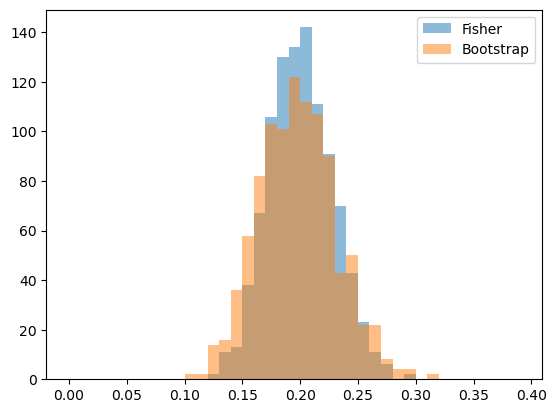

In [27]:
bins = np.arange(0,0.4,0.01)
plt.hist(fisher_lens, alpha=0.5, bins=bins, label='Fisher')
plt.hist(boot_lens, alpha=0.5, bins=bins, label='Bootstrap')
plt.legend()

We see that the bootstrap generates confidence interval lengths which tend to be a bit more extreme: either very short or very long.

In [28]:
fisher_proportion = fisher_coverage.mean()

In [29]:
bootstrap_proportion = boot_coverage.mean()

In [30]:
print(f"Coverage for Fisher's method: {fisher_proportion:.3f}")
print(f"Coverage for the bootstrap: {bootstrap_proportion:.3f}")

Coverage for Fisher's method: 0.956
Coverage for the bootstrap: 0.933


So Fisher's method has higher coverage for this problem.